# Looping to make a new map
Unfortunately or fortunately, I am focusing on transportation barriers so the graph that I want to make revolves around driving distance which is just like the example in class. I will try to spice it up a little bit but the first buncha steps are going to be the same.

In [1]:
# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

# for interactive webmaps
import folium

In [2]:
latlon = [33.98360403257549, -118.38582269466457] # Already Centered on the best park in District 2 according to our metrics: Van Ness Park
network_type = 'drive' # Change network type because I am focusing on transportation
trip_times = [5, 10, 15, 20] #in minutes, 
meters_per_minute = 670 # travel distance per minute for a car going 25 mph

In [3]:
G = ox.graph_from_point(latlon, network_type=network_type, dist = 4000) # expand bc im in a car

In [4]:
G = ox.project_graph(G, to_crs='epsg:3857')

In [5]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [6]:
# get the bounding box coordinates
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13183474.242685033
4021782.620679719
-13173839.485097133
4031422.446325891


In [7]:
# calculate the centroid
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13178656.863891084
4026602.533502805


In [8]:
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x) # Defining this for later, just as the park center

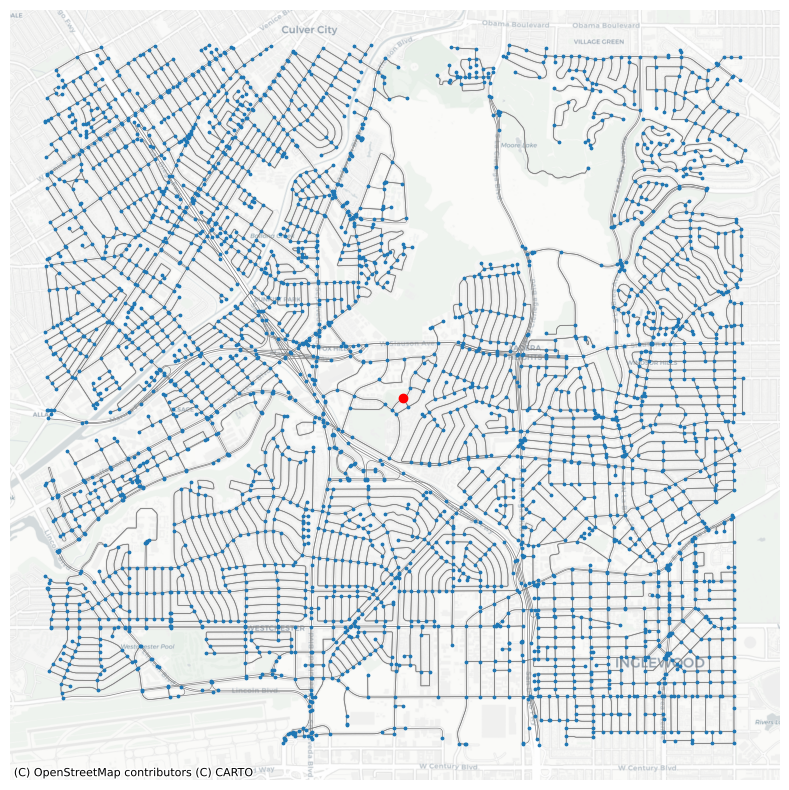

In [9]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5, # don't do more than 1
               edgecolor='gray', # line color
               zorder=10) #3D position (layers)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=3, 
               zorder=20) #this is higher so goes over the lines

# add the center node in red also to ax
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30) # top-most layers

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

# post note: that worked out well because the centroid is focused on the parking lot entrance to the park, where drivers would access it. 

In [10]:
gdf_edges['drive_time'] = gdf_edges['length']/meters_per_minute

In [11]:
gdf_edges[['osmid','name','highway','length','drive_time']].sample(15)

,,,osmid,name,highway,length,drive_time
u,v,key,,,,,
1842872044,1836054030,0,"[264105145, 404964587]",West Bluff Creek Drive,tertiary,84.100,0.125522
123146238,1719349020,0,13377574,South Cedar Avenue,residential,113.085,0.168784
1721280478,1768126868,0,13367155,Vicksburg Avenue,residential,279.239,0.416775
4149954288,122387966,0,"[49286490, 413730502]",La Tijera Boulevard,secondary,59.274,0.088469
123661759,123661763,0,165884109,Buckler Avenue,residential,100.026,0.149293
122912559,694588253,0,55286833,East 65th Street,residential,211.081,0.315046
4320643793,123508969,0,"[398601890, 384176166]",Washington Boulevard,secondary,117.406,0.175233
122379390,122379394,0,165774475,Don Diego Drive,residential,124.883,0.186393
122985905,122715186,0,13349747,Port Road,residential,77.900,0.116269


## I get it now.
It took me a while to understand this but I get it. The drive_time is a function of the length of the edges, not the time to get to the centroid. I have to say it again so I don't forget.

In [12]:
cmap = 'RdYlGn'

In [13]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap=cmap, 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15, 20]
['#a50026', '#fdbf6f', '#b7e075', '#006837']


In [14]:
iso_colors.reverse()
iso_colors

['#006837', '#b7e075', '#fdbf6f', '#a50026']

In [15]:
time_color = list(zip(trip_times, iso_colors))
time_color

[(5, '#006837'), (10, '#b7e075'), (15, '#fdbf6f'), (20, '#a50026')]

In [16]:
for time,color in list(time_color):
    print('The color for a '+str(time)+' minute drive is ' + color) # change this a tiny bit for grammer

The color for a 5 minute drive is #006837
The color for a 10 minute drive is #b7e075
The color for a 15 minute drive is #fdbf6f
The color for a 20 minute drive is #a50026


In [17]:
time_color.reverse()
time_color

[(20, '#a50026'), (15, '#fdbf6f'), (10, '#b7e075'), (5, '#006837')]

In [18]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time,distance='time') #centernode is the park, defined earlier 

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' a minute drive ' + color)
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = time
        gdf_nodes.loc[node,'color'] = color

There are 1295 nodes within 20 a minute drive #a50026
There are 540 nodes within 15 a minute drive #fdbf6f
There are 177 nodes within 10 a minute drive #b7e075
There are 29 nodes within 5 a minute drive #006837


In [19]:
gdf_nodes.sample(10)

,y,x,highway,street_count,lon,lat,ref,geometry,time,color
osmid,,,,,,,,,,
123059259,4.027533e+06,-1.318336e+07,NaN,3,-118.428142,33.990546,NaN,POINT (-13183360.463 4027532.642),NaN,nan
4011611722,4.024594e+06,-1.317456e+07,NaN,3,-118.349131,33.968657,NaN,POINT (-13174564.954 4024594.203),NaN,nan
3874638359,4.023050e+06,-1.317489e+07,NaN,3,-118.352057,33.957150,NaN,POINT (-13174890.697 4023049.809),NaN,nan
3548217261,4.023197e+06,-1.317690e+07,NaN,3,-118.370149,33.958246,NaN,POINT (-13176904.712 4023196.861),NaN,nan
5883250861,4.025981e+06,-1.317689e+07,NaN,3,-118.370002,33.978989,NaN,POINT (-13176888.292 4025981.111),10.0,#b7e075
122821447,4.028514e+06,-1.318252e+07,NaN,4,-118.420595,33.997853,NaN,POINT (-13182520.379 4028513.754),NaN,nan
950801821,4.027421e+06,-1.318293e+07,NaN,3,-118.424307,33.989716,NaN,POINT (-13182933.531 4027421.206),NaN,nan
122699296,4.022110e+06,-1.317593e+07,NaN,3,-118.361352,33.950148,NaN,POINT (-13175925.390 4022110.070),NaN,nan
1840796814,4.022637e+06,-1.317501e+07,NaN,3,-118.353163,33.954074,NaN,POINT (-13175013.839 4022637.019),NaN,nan


In [20]:
import numpy as np
gdf_nodes['color'] = gdf_nodes['color'].replace('nan', np.nan)
gdf_nodes = gdf_nodes.dropna(subset=['color'])
gdf_nodes

,y,x,highway,street_count,lon,lat,ref,geometry,time,color
osmid,,,,,,,,,,
653656,4.023418e+06,-1.317767e+07,traffic_signals,4,-118.377054,33.959897,NaN,POINT (-13177673.384 4023418.457),20.0,#a50026
1718677597,4.023635e+06,-1.317748e+07,NaN,3,-118.375314,33.961507,NaN,POINT (-13177479.699 4023634.581),20.0,#a50026
123189012,4.023419e+06,-1.317748e+07,NaN,4,-118.375320,33.959904,NaN,POINT (-13177480.378 4023419.383),20.0,#a50026
122697159,4.023418e+06,-1.317787e+07,NaN,4,-118.378815,33.959895,NaN,POINT (-13177869.429 4023418.135),20.0,#a50026
653681,4.027379e+06,-1.318026e+07,NaN,3,-118.400313,33.989402,NaN,POINT (-13180262.564 4027379.089),20.0,#a50026
...,...,...,...,...,...,...,...,...,...,...
5883250867,4.025926e+06,-1.317693e+07,traffic_signals,4,-118.370352,33.978580,NaN,POINT (-13176927.365 4025926.179),10.0,#b7e075
5883250866,4.026005e+06,-1.317688e+07,NaN,3,-118.369901,33.979164,NaN,POINT (-13176877.116 4026004.657),15.0,#fdbf6f
7450767269,4.026962e+06,-1.318215e+07,turning_circle,1,-118.417235,33.986295,NaN,POINT (-13182146.301 4026961.982),20.0,#a50026


In [21]:
isochrones = gdf_nodes.dissolve(by = "time")
isochrones
# make the polygons by the time intervals

,geometry,y,x,highway,street_count,lon,lat,ref,color
time,,,,,,,,,
5.0,"MULTIPOINT ((-13179644.752 4026585.688), (-131...",4.025733e+06,-1.317873e+07,traffic_signals,3,-118.386559,33.977142,None,#006837
10.0,"MULTIPOINT ((-13180576.719 4027215.456), (-131...",4.027635e+06,-1.318043e+07,traffic_signals,3,-118.401795,33.991309,None,#b7e075
15.0,"MULTIPOINT ((-13182909.174 4026227.059), (-131...",4.025658e+06,-1.317883e+07,traffic_signals,3,-118.387477,33.976581,49B,#fdbf6f
20.0,"MULTIPOINT ((-13183450.821 4026399.015), (-131...",4.023418e+06,-1.317767e+07,traffic_signals,4,-118.377054,33.959897,50B,#a50026


In [22]:
isochrones = isochrones.convex_hull.reset_index(name='geometry')
isochrones
# make the polygon outta the nodes

,time,geometry
0,5.0,"POLYGON ((-13178184.953 4025638.422, -13178731..."
1,10.0,"POLYGON ((-13177544.309 4025073.320, -13179644..."
2,15.0,"POLYGON ((-13179801.479 4023964.271, -13182909..."
3,20.0,"POLYGON ((-13176897.253 4021795.342, -13180711..."


In [23]:
isochrones.sort_values(by='time', ascending=False,inplace=True)
isochrones.rename(columns={'time': 'Drive Time (min)'}, inplace=True)
isochrones

,Drive Time (min),geometry
3,20.0,"POLYGON ((-13176897.253 4021795.342, -13180711..."
2,15.0,"POLYGON ((-13179801.479 4023964.271, -13182909..."
1,10.0,"POLYGON ((-13177544.309 4025073.320, -13179644..."
0,5.0,"POLYGON ((-13178184.953 4025638.422, -13178731..."


# Add in other datasets

In [24]:
import pandas as pd 
import geopandas as gpd

In [25]:
Income = pd.read_excel(
    'Data/Income-Data.xlsx',
    dtype=
    {
        'GEO_ID':str,
    }
)
Income = Income.drop([0])
Income.info

<bound method DataFrame.info of       Geometry       GEO_ID  Less_10k  10k_to_14999  15k_to_19999  20k_24999  \
1     1400000U  06037101110        54           126            49         33   
2     1400000U  06037101122        88             0             7         42   
3     1400000U  06037101220        78            82            28        102   
4     1400000U  06037101221        76           107           118        148   
5     1400000U  06037101222       161           167            34         41   
...        ...          ...       ...           ...           ...        ...   
2494  1400000U  06037980038         0             0             0          0   
2495  1400000U  06037980039         0             0             0          0   
2496  1400000U  06037990100         0             0             0          0   
2497  1400000U  06037990200         0             0             0          0   
2498  1400000U  06037990300         0             0             0          0   

      2

In [26]:
Tracts = gpd.read_file('Data/tl_2021_06_tract.zip')

Tracts1 = Tracts[['GEOID','geometry']]
Tracts1.columns = ['GEO_ID',
'geometry']
Tracts1.head()

,GEO_ID,geometry
0,06085504321,"POLYGON ((-121.87556 37.39924, -121.87535 37.3..."
1,06085504410,"POLYGON ((-121.88886 37.40758, -121.88576 37.4..."
2,06085507003,"POLYGON ((-122.02489 37.21683, -122.02459 37.2..."
3,06085507004,"POLYGON ((-121.99304 37.22562, -121.99249 37.2..."
4,06085502204,"POLYGON ((-121.93167 37.29803, -121.92801 37.3..."


In [27]:
District2 = pd.read_excel('Data/District2.xlsx',
    dtype =
    {
        'CT20':str,
    }
)
District2['GEO_ID'] = '06' + '037' + District2['CT20']
District2.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,GEO_ID
0,640,2,640,211000,2110.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,5,Westside Planning Area,3.881413e+06,9270.888577,06037211000
1,641,2,641,211121,2111.21,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,3.125745e+05,2799.117227,06037211121
2,642,3,642,211122,2111.22,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,5.341218e+05,3050.487937,06037211122
3,643,2,643,211123,2111.23,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,2.513022e+05,2501.035059,06037211123
4,644,2,644,211124,2111.24,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,5.771177e+05,3012.923477,06037211124


In [28]:
District2Tracts=Tracts1.merge(District2,on="GEO_ID")
District2Tracts.head()

,GEO_ID,geometry,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length
0,06037541605,"POLYGON ((-118.21630 33.90339, -118.21538 33.9...",1791,1,1791,541605,5416.05,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,COMPTON,NaN,INCORPORATED CITY,9,Metro Planning Area,1.270111e+06,5153.474133
1,06037542000,"POLYGON ((-118.20734 33.90732, -118.20733 33.9...",1796,2,1796,542000,5420.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,COMPTON,EAST RANCHO DOMINGUEZ,INCORPORATED/UNINCORPORATED,9,Metro Planning Area,1.417641e+06,5127.847215
2,06037542401,"POLYGON ((-118.21998 33.89600, -118.21985 33.8...",1802,1,1802,542401,5424.01,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,COMPTON,NaN,INCORPORATED CITY,9,Metro Planning Area,1.881859e+06,5783.777118
3,06037542402,"POLYGON ((-118.21883 33.88859, -118.21868 33.8...",1803,2,1803,542402,5424.02,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,COMPTON,NaN,INCORPORATED CITY,9,Metro Planning Area,2.423799e+06,8444.461398
4,06037542502,"POLYGON ((-118.23599 33.89591, -118.23571 33.8...",1805,1,1805,542502,5425.02,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,COMPTON,NaN,INCORPORATED CITY,9,Metro Planning Area,1.447622e+06,5218.654088


In [29]:
District2TractsGEO=District2Tracts.merge(Income,on="GEO_ID")
District2TractsGEO.head()

,GEO_ID,geometry,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,...,35k_39999,40k_to_44999,45k_to_49999,50k_to_59999,60k_to_74999,75k_to_99999,100k_to_124999,125k_to_149999,150k_to_199999,200k_plus
0,06037541605,"POLYGON ((-118.21630 33.90339, -118.21538 33.9...",1791,1,1791,541605,5416.05,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,...,101,91,32,251,92,186,153,98,11,27
1,06037542000,"POLYGON ((-118.20734 33.90732, -118.20733 33.9...",1796,2,1796,542000,5420.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,...,13,55,72,119,146,289,32,99,120,33
2,06037542401,"POLYGON ((-118.21998 33.89600, -118.21985 33.8...",1802,1,1802,542401,5424.01,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,...,21,69,54,142,106,215,179,63,21,38
3,06037542402,"POLYGON ((-118.21883 33.88859, -118.21868 33.8...",1803,2,1803,542402,5424.02,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,...,47,74,17,46,149,135,118,142,45,11
4,06037542502,"POLYGON ((-118.23599 33.89591, -118.23571 33.8...",1805,1,1805,542502,5425.02,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,...,51,87,57,30,211,238,50,10,57,10


In [30]:
VulnerableCar = pd.read_excel('Data/Transport.xlsx',
 dtype =
    {
        'TRACT':str,
    }
)
VulnerableCar['GEO_ID'] = '06' + '037' + VulnerableCar['TRACT']
VulnerableCar.head()

,TRACT,D2_Transp,atmbl_p,GEO_ID
0,101110,2,53.753368,06037101110
1,101122,1,98.986270,06037101122
2,101210,1,28.538432,06037101210
3,101220,2,16.745798,06037101220
4,101300,2,59.707430,06037101300


In [31]:
District2VulnerableCar=District2TractsGEO.merge(VulnerableCar,on="GEO_ID")
District2VulnerableCar.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   GEO_ID          407 non-null    object  
 1   geometry        407 non-null    geometry
 2   OBJECTID_12     407 non-null    int64   
 3   Join_Count      407 non-null    int64   
 4   TARGET_FID      407 non-null    int64   
 5   CT20            407 non-null    object  
 6   LABEL           407 non-null    float64 
 7   NAME            407 non-null    object  
 8   SUP_NAME        407 non-null    object  
 9   DIST_SUP        407 non-null    int64   
 10  CITYNAME_ALF    361 non-null    object  
 11  NAME_1          55 non-null     object  
 12  JURISDICTION    407 non-null    object  
 13  AREA_NUM        407 non-null    int64   
 14  AREA_NAME       407 non-null    object  
 15  Shape__Area     407 non-null    float64 
 16  Shape__Length   407 non-null    float64 
 17  Geometry

In [32]:
m = folium.Map(location=latlon,zoom_start=13, tiles='Cartodb Positron')

folium.Choropleth(
    geo_data=District2VulnerableCar,
    data=District2VulnerableCar,
    key_on='feature.properties.GEO_ID',
    columns=['GEO_ID','D2_Transp'],
    fill_color='RdBu_r',
    line_weight=0.1, 
    fill_opacity=0.7,
    line_opacity=0.2).add_to(m)  

isochrones.explore(m=m,column='Drive Time (min)',color='iso_colors',cmap=cmap,opacity=0.8,categorical=True)

gdf_nodes.explore(m=m,column='time')

title_html = '<h3 align="center" style="font-size:20px"><b>Transportation Barriers overlayed with a 20 Minute drive radius around Van Ness Park in District 2</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

m